In [164]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Last year, Baseball Prospectus introduced new metrics to better measure how pitches move with
#particular attention to where they are before and after the point it is believed hitters have
#to decide whether or not to swing. This analysis will focus mainly on PlatePreRatio, which 
#measures the ratio between the distance between consecutive pitches at the decision point and
#where the pitch ultimately ends up.

In [3]:
#Importing relevant spreadsheets as dataframes. These were downloaded from 
#Baseball Reference (pitch info) and Baseball Prospectus (bpstats)
pitch_info_df = pd.DataFrame(pd.read_excel("Pitch_info.xlsx"))
bpstats_df = pd.DataFrame(pd.read_csv("bpstats_03-18-2019.csv"))

In [62]:
pitch_info_df.head()

,Rk,Name,Age,Tm,IP,PA,Pit,Pit/PA,Str,Str%,...,L/SO,S/SO,L/SO%,3pK,4pW,PAu,Pitu,Stru,last_names,first_names
0,1,Jason Adam\adamja01,26,KCR,32.1,143,571,3.99,350,0.613,...,7,30,0.189,3,4,0,0,0,Adam,Jason
1,2,Austin L. Adams\adamsau02,27,WSN,1.0,7,24,3.43,11,0.458,...,0,0,NaN,0,0,0,0,0,Adams,Austin
2,3,Chance Adams\adamsch01,23,NYY,7.2,34,153,4.50,92,0.601,...,0,4,0.000,0,0,0,0,0,Adams,Chance
3,4,Matt Albers\alberma01,35,MIL,34.1,158,673,4.26,424,0.630,...,6,26,0.188,4,3,0,0,0,Albers,Matt
4,5,Sandy Alcantara\alcansa01,22,MIA,34.0,148,567,3.83,345,0.608,...,5,25,0.167,10,4,0,0,0,Alcantara,Sandy


In [7]:
bpstats_df.head()

,#,YEAR,Sortable Name,THROWS,AGE,STAND,COUNT,RelDist,PreMax,PreMaxTime,PlateDist,FTimeDiff,PlatePreRatio
0,1,2018,"Adam, Jason",R,26,L,200,3.17,1.68,0.175,22.36,0.0346,13.3
1,2,2018,"Adam, Jason",R,26,R,229,3.87,1.93,0.180,20.38,0.0502,10.5
2,3,2018,"Adams, Austin",R,27,L,10,1.99,2.22,0.169,32.29,0.0178,14.5
3,4,2018,"Adams, Austin",R,27,R,7,1.85,1.71,0.165,17.63,0.0143,10.3
4,5,2018,"Adams, Chance",R,23,L,54,2.00,1.52,0.173,20.13,0.0319,13.2


In [6]:
#Cleaning pitch info names, so that eventually we can merge the dataframes on player names
names = []
for i in range(0,len(pitch_info_df['Name'])):
    names.append(pitch_info_df["Name"][i].split('\\')[0].split())

In [7]:
#Creating lists for first and last names from names column
first_names = []
last_names = []
for i in range(0, len(names)):
    first_names.append(names[i][0])
    last_names.append(names[i][-1])

In [8]:
#Cleaning asterisks from last names list
for i in range (0, len(last_names)):
    if "*" in last_names[i]:
        last_names[i] = last_names[i].replace('*', '')

In [9]:
#Adding first and last name columns to pitch_info dataframe
pitch_info_df['last_names'] = last_names
pitch_info_df['first_names'] = first_names

In [41]:
#Combining pitcher stats across batter handedness
bp_stats_df_grouped = bpstats_df.groupby(by='Sortable Name').sum()

In [42]:
#Returning age and year columns to their correct values (grouping process doubled them)
bp_stats_df_grouped["AGE"] = bp_stats_df_grouped["AGE"]/2
bp_stats_df_grouped["YEAR"] = bp_stats_df_grouped["YEAR"]/2

In [43]:
bp_stats_df_grouped.head()

,#,YEAR,AGE,COUNT,RelDist,PreMax,PreMaxTime,PlateDist,FTimeDiff,PlatePreRatio
Sortable Name,,,,,,,,,,
"Adam, Jason",3,2018.0,26.0,429,7.04,3.61,0.355,42.74,0.0848,23.8
"Adams, Austin",7,2018.0,27.0,17,3.84,3.93,0.334,49.92,0.0321,24.8
"Adams, Chance",11,2018.0,23.0,119,3.67,3.05,0.349,37.21,0.0685,24.3
"Albers, Matt",15,2018.0,35.0,515,4.49,2.70,0.335,36.14,0.0400,26.7
"Alcantara, Sandy",19,2018.0,22.0,419,3.62,2.81,0.337,35.42,0.0450,25.2


In [44]:
#Breaking the name column into lists with first and last names
bp_stats_df_grouped["name_split"] = bp_stats_df_grouped.index.str.split(",")

In [45]:
bp_stats_df_grouped["last_names"] = ""
bp_stats_df_grouped["first_names"] = ""

In [47]:
#populating first and last name columns in preparation to merge with pitch info dataframe
for i in range (0, len(bp_stats_df_grouped["name_split"])):
    bp_stats_df_grouped["last_names"][i] = bp_stats_df_grouped["name_split"][i][0]
    bp_stats_df_grouped["first_names"][i] = bp_stats_df_grouped["name_split"][i][1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
bp_stats_df_grouped.head()

,#,YEAR,AGE,COUNT,RelDist,PreMax,PreMaxTime,PlateDist,FTimeDiff,PlatePreRatio,name_split,last_names,first_names
Sortable Name,,,,,,,,,,,,,
"Adam, Jason",3,2018.0,26.0,429,7.04,3.61,0.355,42.74,0.0848,23.8,"[Adam, Jason]",Adam,Jason
"Adams, Austin",7,2018.0,27.0,17,3.84,3.93,0.334,49.92,0.0321,24.8,"[Adams, Austin]",Adams,Austin
"Adams, Chance",11,2018.0,23.0,119,3.67,3.05,0.349,37.21,0.0685,24.3,"[Adams, Chance]",Adams,Chance
"Albers, Matt",15,2018.0,35.0,515,4.49,2.70,0.335,36.14,0.0400,26.7,"[Albers, Matt]",Albers,Matt
"Alcantara, Sandy",19,2018.0,22.0,419,3.62,2.81,0.337,35.42,0.0450,25.2,"[Alcantara, Sandy]",Alcantara,Sandy


In [51]:
#Removing columns that add no information
bp_stats_df_clean = bp_stats_df_grouped[["YEAR", "AGE", "COUNT", "RelDist", "PreMax", "PreMaxTime", "PlateDist", "FTimeDiff", "PlatePreRatio", "last_names", "first_names"]]

In [64]:
#Merging the dataframes on player names
pitch_merge_df = bp_stats_df_clean.merge(pitch_info_df, on=['last_names'], how='inner')

In [111]:
pitch_merge_df.columns

Index([         'YEAR',           'AGE',         'COUNT',       'RelDist',
              'PreMax',    'PreMaxTime',     'PlateDist',     'FTimeDiff',
       'PlatePreRatio',    'last_names', 'first_names_x',            'Rk',
                'Name',           'Age',            'Tm',            'IP',
                  'PA',           'Pit',        'Pit/PA',           'Str',
                'Str%',         'L/Str',         'S/Str',         'F/Str',
               'I/Str',        'AS/Str',         'I/Bll',        'AS/Pit',
                 'Con',          '1st%',             0.3,           '30c',
                 '30s',            0.02,           '02c',           '02s',
                 '02h',          'L/SO',          'S/SO',         'L/SO%',
                 '3pK',           '4pW',           'PAu',          'Pitu',
                'Stru', 'first_names_y',            'Ks',            'K%'],
      dtype='object')

In [66]:
#Creating columns for total strikeouts and strikeout rate
pitch_merge_df["Ks"] = pitch_merge_df["L/SO"] + pitch_merge_df["S/SO"]
pitch_merge_df["K%"] = pitch_merge_df["Ks"]/pitch_merge_df["PA"]

In [129]:
#Creating columns for looking strikes and swinging strikes as a percent of total pitches
pitch_merge_df["Looking Strk/Pit"] = pitch_merge_df["L/Str"]*pitch_merge_df["Str"] / pitch_merge_df["Pit"]
pitch_merge_df["Swinging Strk/Pit"] = pitch_merge_df["S/Str"]*pitch_merge_df["Str"] / pitch_merge_df["Pit"]
pitch_merge_df["Foul Strk/Pit"] = pitch_merge_df["F/Str"]*pitch_merge_df["Str"] / pitch_merge_df["Pit"]

In [130]:
#Creating a dataframe for all correlations
pitch_correlations = pd.DataFrame(pitch_merge_df.corr())

In [131]:
#Saving the spreadsheet with all correlations
pitch_correlations.to_excel("pitch_correlations.xlsx")

In [132]:
#Honing in on PlatePreRatio to examine its correlates
ppr_df = pd.DataFrame(pitch_correlations['PlatePreRatio'])

In [183]:
#Isolating relevant and interesting statistics
ppr_df_cleaned = ppr_df.loc[["Pit/PA", "Str%", "Foul Strk/Pit", "Con" , "L/SO", "K%", "Looking Strk/Pit", "Swinging Strk/Pit"]]

In [188]:
#Making the names more recognizable
ppr_df_cleaned = ppr_df_cleaned.rename(index={"Con" : "Contact", "L/SO" : "Looking Ks/Total Ks", "Pit/Pa" : "Pitches/PA", "Str%" : "Strike%"})

In [189]:
ppr_df_cleaned

,PlatePreRatio
Pit/PA,0.115289
Strike%,0.027532
Foul Strk/Pit,0.116319
Contact,-0.217642
Looking Ks/Total Ks,0.040682
K%,0.124897
Looking Strk/Pit,-0.038281
Swinging Strk/Pit,0.226735


In [190]:
#Ordering to prepare for visualization
ppr_df_cleaned = ppr_df_cleaned.sort_values(by="PlatePreRatio")

In [199]:
#x tick prep and color coding
x_tick_locs = np.arange(0,len(ppr_df_cleaned["PlatePreRatio"]))
labels = ppr_df_cleaned.index
colors = []
for value in ppr_df_cleaned["PlatePreRatio"]:
    if abs(value) > .2:
        colors.append('red')
    elif abs(value) > .1:
        colors.append('orange')
    else:
        colors.append('grey')

Text(0,0.5,'R-squared')

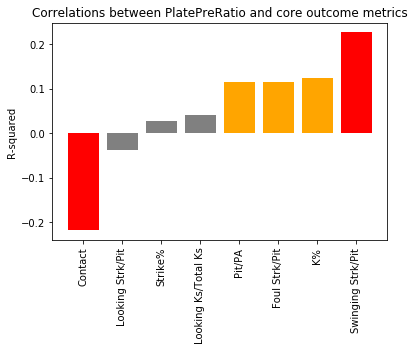

In [200]:
#Bar chart creation
plt.bar(ppr_df_cleaned.index, ppr_df_cleaned["PlatePreRatio"], color = colors)
plt.xticks(x_tick_locs, labels, rotation='vertical')
plt.title("Correlations between PlatePreRatio and core outcome metrics")
plt.ylabel("R-squared")


In [ ]:
#Topline conclusion: the ratio between the distance between consecutive pitchers at the
#hitter's presumed decision point and the distance between those same pitches when they
#reach the plate has a modest effect on the pitcher's ability to induce swinging strikes,
#and a corresponding effect on overall strikeout percentage. These bendy pitches may also 
#cause a small increase in foul ball rate, but no noticable impact on looking strikes or strikeouts.
#Further study will be needed to determine if this effect holds when accounting for raw stuff
#metrics, namely velocity and movement of pitches. Studies that better account for pitch
#sequencing would also make this analysis more complete.